<a href="https://colab.research.google.com/github/johanlopezs/YOLO_microorganism/blob/main/Tutorial_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
import os

# Ruta de la carpeta que deseas copiar
ruta_origen = '/content/drive/MyDrive/YOLO_tutorial'

# Ruta de la carpeta destino
ruta_destino = '/content/yolov5'

# Copiar la carpeta de origen a la carpeta destino
shutil.copytree(ruta_origen, ruta_destino)

'/content/yolov5'

Tutorial entrenar y preparar los datos.
Los datos pueden ser descargardos usando el siguiente link: https://zenodo.org/record/7643929
se requiere ademas el uso de las bibliotecas 


*   zenodo_get
*   rarfile



In [ ]:
# descargar librerias necesarias. 
!pip install zenodo_get
!pip install rarfile

In [ ]:
import zenodo_get
import rarfile
# # nos ubicamos en el lugar en donde se descargaran los datos.
%cd /content/yolov5
# # usando la funcion zenodo_get descargamos la base de datos.
!zenodo_get https://zenodo.org/record/7657731

# descomprimimos el archivo .rar
# Creamos un objeto de tipo RarFile con la ruta al archivo .rar que queremos descomprimir
archivo_rar = rarfile.RarFile("Cryptosporidium.rar")
# # Extraemos el contenido del archivo .rar a una carpeta
archivo_rar.extractall("/content/yolov5")

# Elegir el set de datos.

In [3]:
# verificamos la informacion en cada uno de los set de datos en los archivos .yaml
dataset = 'optical_microscopy_images' #@param ['optical_microscopy_images', 'phase_contrast_microscopy_images']
%cd /content/yolov5
if dataset == 'optical_microscopy_images':
  print ('----------------optical_microscopy_images-----------------------------')
  !cat optical_microscopy_images/data.yaml
else: 
  print ('\n-----------------phase_contrast_microscopy_images----------------------------')
  !cat phase_contrast_microscopy_images/data.yaml

/content/yolov5
----------------optical_microscopy_images-----------------------------
names:
- Giardia
- C. parvum
nc: 2
train: optical_microscopy_images/train/images
val: optical_microscopy_images/valid/images


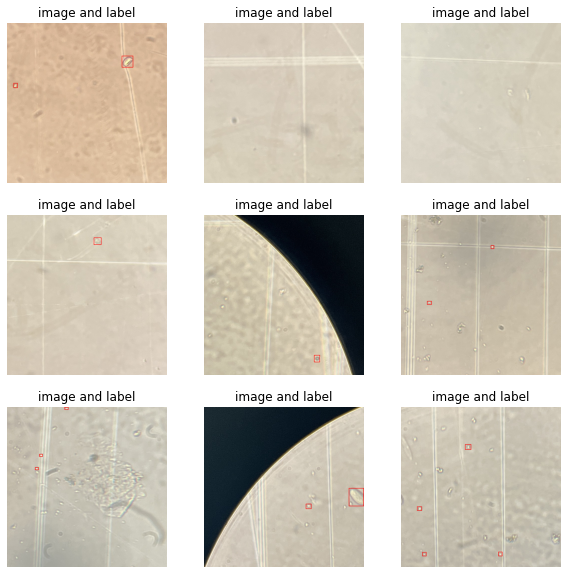

In [4]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def yolo_to_xml_bbox(bbox, w, h):
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


def draw_image(img, bboxes):
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        draw.rectangle(bbox, outline="red", width=2)
    plt.imshow(img)
    plt.title('image and label')
    plt.axis('off')
    plt.show
#####################################################
images_dir = dataset + '/valid/images/'
images = !ls -1 '{images_dir}'
labels_dir = dataset +'/valid/labels/'
labels = !ls -1 '{labels_dir}'
##################################################

plt.figure(figsize=(10,10))
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  bboxes = []
  img = Image.open(images_dir + images[i])
  if os.path.getsize(labels_dir + labels[i]) > 5:
    with open(labels_dir + labels[i], 'r', encoding='utf8') as f:
        for line in f:
            data = line.strip().split(' ')
            bbox = [float(x) for x in data[1:]]
            bboxes.append(yolo_to_xml_bbox(bbox, img.width, img.height))
  draw_image(img, bboxes)


# seleccionar entre los 3 modelos: [YOLOs, YOLOm y YOLOl]

In [ ]:
%cd /content/yolov5
modelo = 'YOLOl' #@param['YOLOs', 'YOLOm','YOLOl']
datos = 'optical_microscopy_images'
if modelo == 'YOLOs':
  !python train.py --img 640 --batch 16 --epochs 10 --data {dataset}/data.yaml --weights yolov5s.pt --cache  
elif modelo == 'YOLOm':
  !python train.py --img 640 --batch 16 --epochs 10 --data {dataset}/data.yaml --weights yolov5m.pt --cache
elif modelo == 'YOLOl':
  !python train.py --img 640 --batch 16 --epochs 10 --data {dataset}/data.yaml --weights yolov5l.pt --cache
